# Author : Amit Kumar Poddar

## The Spark Foundation - GRIP
## Task 4 - Exploratory Data Analysis : Global Terrorism

###  As a security / defence analyst performed exploratory data analysis on 'Global Terrorism' and tried to find out hot zone of terrorism along with that many security issues and insights have been derived by EDA. 

### Importing Libraries and reading data

In [43]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
data= pd.read_csv('globalterrorism.csv',encoding='latin1', dtype='unicode')
data.head(100)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,197002280001,1970,2,28,NaN,0,NaN,102,Jordan,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
96,197003000001,1970,3,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
97,197003010001,1970,3,1,NaN,0,NaN,98,Italy,8,...,NaN,NaN,NaN,NaN,PGIS,1,0,1,1,NaN
98,197003010005,1970,3,1,NaN,0,NaN,217,United States,1,...,The perpetrators painted signs on nearby the b...,Committee on Government Operations United Stat...,"""Colorado R.O.T.C. Blast Attributed to Arsonis...","Robert W. Patterson, ""Crime & the American Res...",Hewitt Project,-9,-9,0,-9,NaN


In [44]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [45]:
data.shape

(181691, 135)

In [46]:
data.rename (columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType','targtype1_txt':'TargetType','targsubtype1_txt':'TargetSubType','weaptype1_txt':'WeaponType','gname':'Group','nkill':'Killed','nwound':'Wounded','summary':'Summary','motive':'Motive'},inplace=True)

In [47]:
data=data[['eventid', 'Year','Month','Day','Country','State','Region','City','Latitude','Longitude','AttackType','WeaponType','TargetType', 'TargetSubType','Group','Killed','Wounded','Summary','Motive']]

In [48]:
data.head()

,eventid,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,WeaponType,TargetType,TargetSubType,Group,Killed,Wounded,Summary,Motive
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Unknown,Private Citizens & Property,Named Civilian,MANO-D,1,0,NaN,NaN
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,0,0,NaN,NaN
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Unknown,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,1,0,NaN,NaN
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,37.99749,23.762728,Bombing/Explosion,Explosives,Government (Diplomatic),Embassy/Consulate,Unknown,NaN,NaN,NaN,NaN
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),Embassy/Consulate,Unknown,NaN,NaN,NaN,NaN


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   eventid        181691 non-null  object
 1   Year           181691 non-null  object
 2   Month          181691 non-null  object
 3   Day            181691 non-null  object
 4   Country        181691 non-null  object
 5   State          181270 non-null  object
 6   Region         181691 non-null  object
 7   City           181257 non-null  object
 8   Latitude       177135 non-null  object
 9   Longitude      177134 non-null  object
 10  AttackType     181691 non-null  object
 11  WeaponType     181691 non-null  object
 12  TargetType     181691 non-null  object
 13  TargetSubType  171318 non-null  object
 14  Group          181691 non-null  object
 15  Killed         171378 non-null  object
 16  Wounded        165380 non-null  object
 17  Summary        115562 non-null  object
 18  Moti

In [50]:
data.describe()

,eventid,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,WeaponType,TargetType,TargetSubType,Group,Killed,Wounded,Summary,Motive
count,181691,181691,181691,181691,181691,181270,181691,181257,177135,177134,181691,181691,181691,171318,181691,171378,165380,115562,50561
unique,181691,47,13,32,205,2855,12,36674,48322,48039,9,12,22,112,3537,205,238,112492,14490
top,197000000001,2014,5,15,Iraq,Baghdad,Middle East & North Africa,Unknown,33.303566,44.371773,Bombing/Explosion,Explosives,Private Citizens & Property,Unnamed Civilian/Unspecified,Unknown,0,0,"09/00/2016: Sometime between September 18, 201...",Unknown
freq,1,16903,16875,6500,24636,7645,50474,9775,7521,7521,88255,92426,43511,11596,82782,88149,103275,100,14889


# EXPLORATORY DATA ANALYSIS

## Number of Global Attacks per Year

Text(0, 0.5, 'No. of attacks')

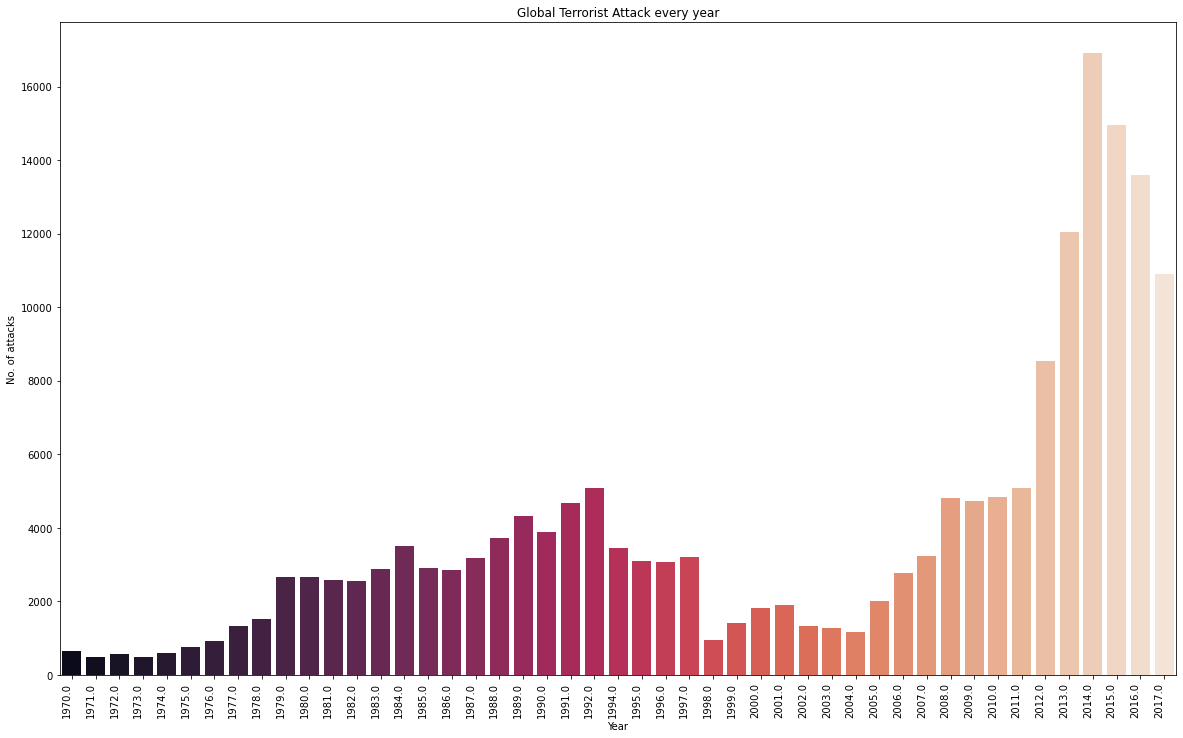

In [121]:
plt.figure(figsize=(20,12))
ax = sns.countplot(x='Year', data=data, palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Global Terrorist Attack every year')
plt.ylabel('No. of attacks')

## Number of death per year

In [145]:
kill = data.loc[:,'Killed']
print('Total no. of Death by Terror attack : ', int(sum(kill.dropna())))

Total no. of Death by Terror attack :  411868


Text(0, 0.5, 'No. of Death')

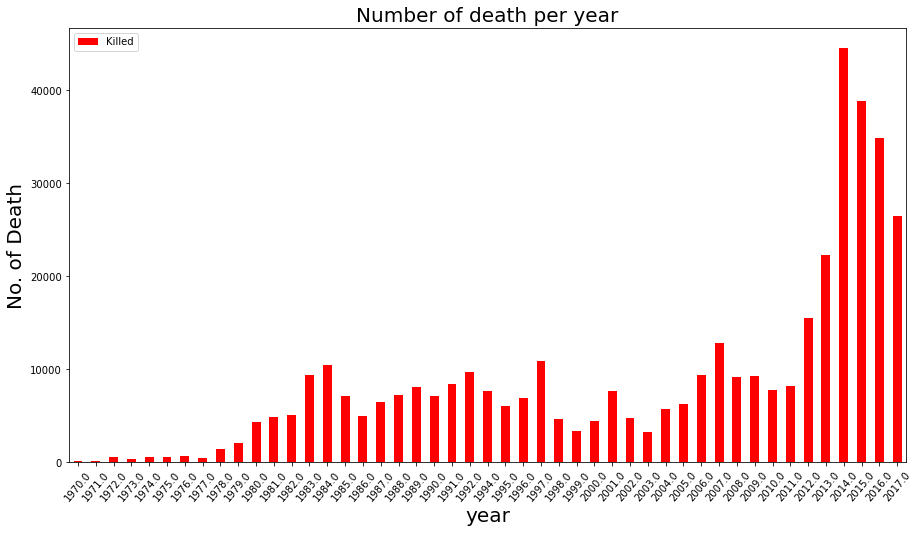

In [186]:
data['Year'] = data['Year'].astype(float)
data['Killed'] = data['Killed'].astype(float)
data[['Year','Killed']].groupby(["Year"],axis=0).sum().plot(kind='bar',figsize=(15,8),subplots=True, color=['red'])
plt.xticks(rotation=50)
plt.title('Number of death per year',fontsize=20)
plt.xlabel('year',fontsize=20)
plt.ylabel('No. of Death',fontsize=20)

## Terrorist Activities in different region year wise

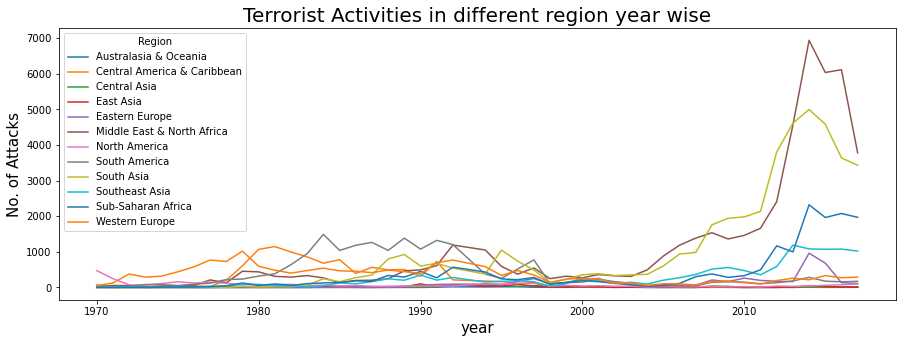

In [185]:
pd.crosstab(data.Year,data.Region).plot(kind='line',stacked=False,figsize=(15,5))
plt.title('Terrorist Activities in different region year wise',fontsize=20)
plt.xlabel('year',fontsize=15)
plt.ylabel('No. of Attacks',fontsize=15)
plt.show()

## Country wise number of attacks

In [13]:
Attack=data.Country.value_counts()[:10]
Attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

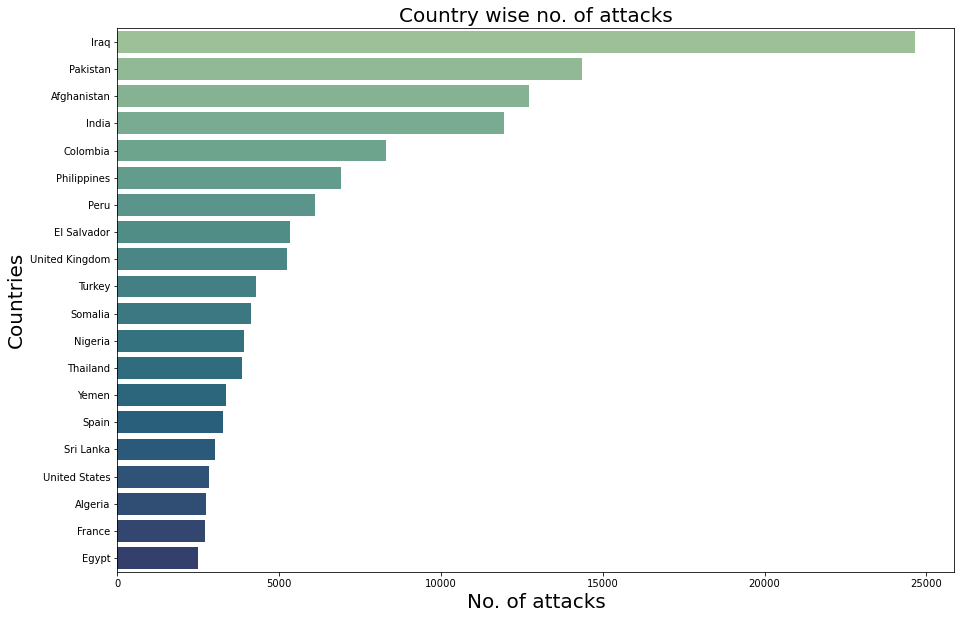

In [115]:
plt.figure(figsize=(15,10))
sns.barplot(x=data['Country'].value_counts().values[:20], y=data['Country'].value_counts()[:20].index,palette='crest')
plt.title('Country wise no. of attacks',fontsize=20)
plt.xlabel('No. of attacks',fontsize=20)
plt.ylabel('Countries',fontsize=20)
plt.show()

## Most effected cities

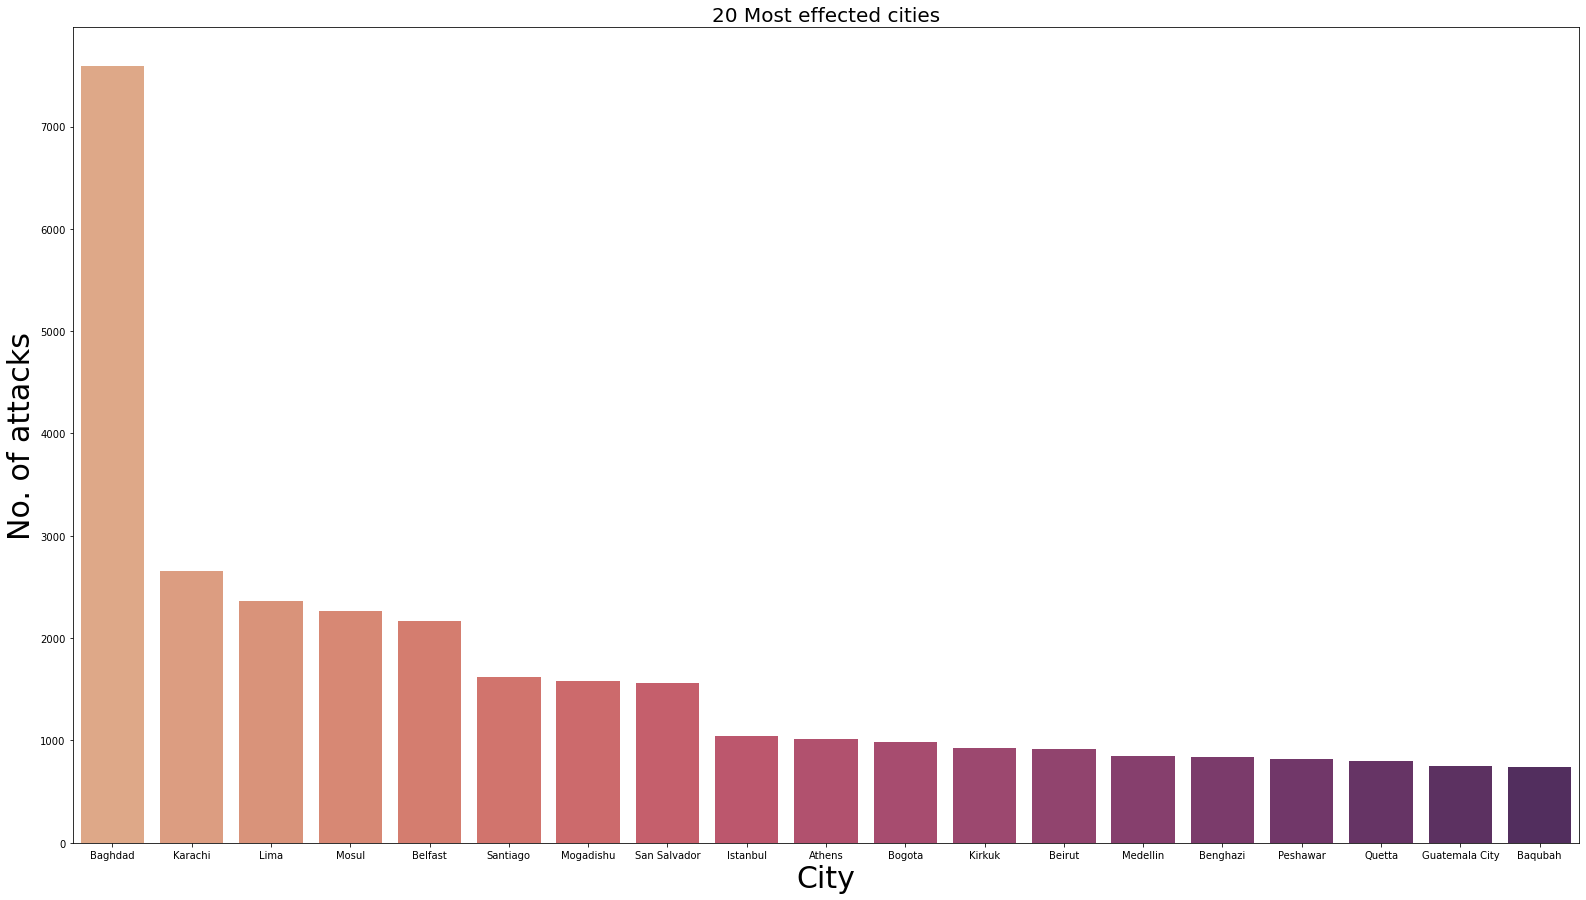

In [113]:
plt.figure(figsize=(27,15))
sns.barplot(y=data['City'].value_counts().values[1:20], x=data['City'].value_counts()[1:20].index,palette='flare')
plt.title('20 Most effected cities',fontsize=20)
plt.xlabel('City',fontsize=30)
plt.ylabel('No. of attacks',fontsize=30)
plt.show()

## Types of terrorist groups 

In [27]:
data.Group.value_counts()[0:20]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

## Types of Terrorist Attack

Text(0, 0.5, 'count of the year')

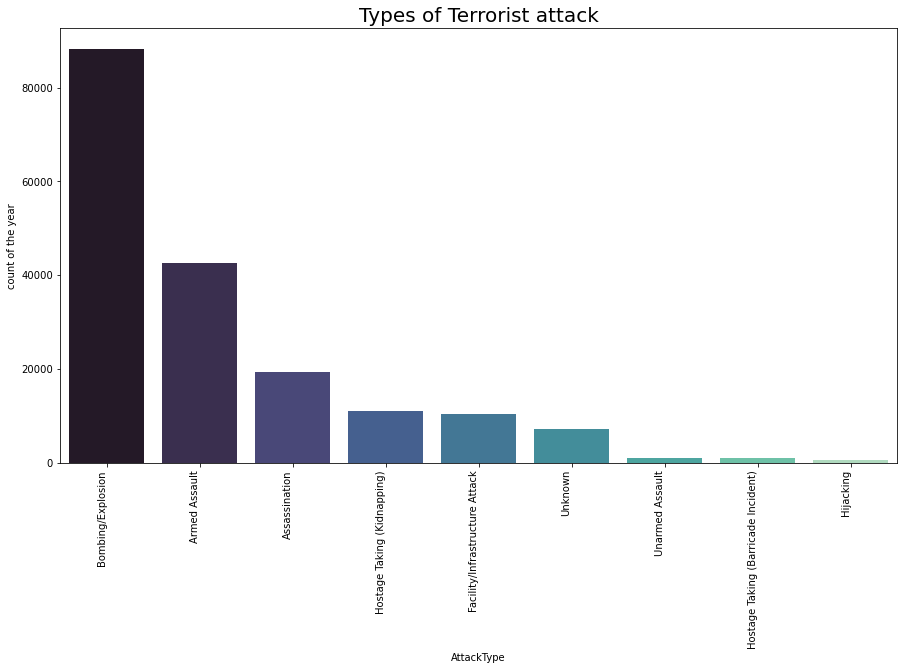

In [114]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='AttackType', data=data, palette='mako', order= data['AttackType'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Types of Terrorist attack', size=20)
plt.ylabel('count of the year')

## Attack type analysis

Text(0.5, 1.0, 'Number of death by Attack type')

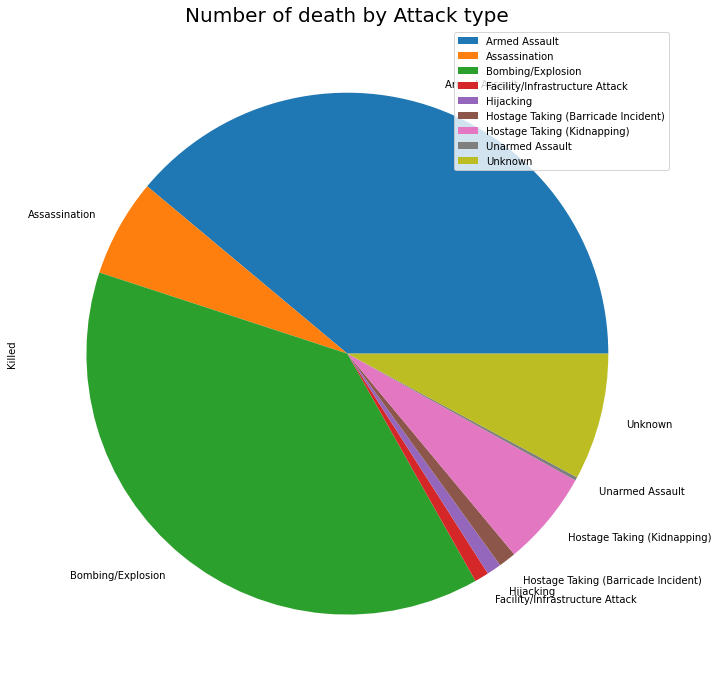

In [126]:
data[['AttackType','Killed']].groupby(["AttackType"],axis=0).sum().plot(kind='pie',figsize=(12,12),subplots= True)
plt.title('Number of death by Attack type',fontsize=20)

Text(0, 0.5, 'Count')

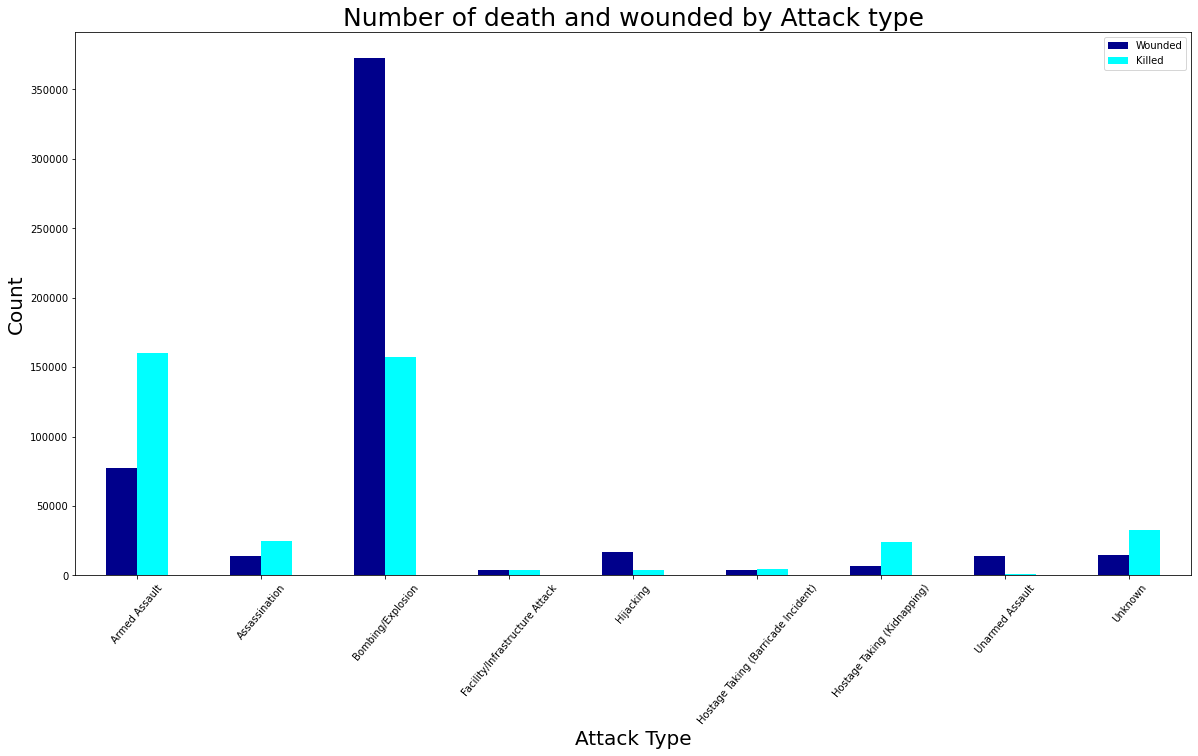

In [138]:
data['Wounded'] = data['Wounded'].astype(float)
data['Killed'] = data['Killed'].astype(float)
data[['AttackType','Wounded','Killed']].groupby(["AttackType"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkblue','cyan'])
plt.xticks(rotation=50)
plt.title('Number of death and wounded by Attack type',fontsize=25)
plt.xlabel('Attack Type',fontsize=20)
plt.ylabel('Count',fontsize=20)

## Analysis of Terrorism in India

In [150]:
India=data[data.Country=='India']
IndianCities=India.groupby(by='City',as_index=False).count().sort_values(by='eventid', ascending = False).iloc[:5,]
India_year=India.groupby(by='Year', as_index=False).sum().loc[:,['Year','Killed']]
India_weapon=India.groupby(by='WeaponType',as_index=False).count().sort_values(by='eventid', ascending = False).iloc[:,:2]

Text(0, 0.5, 'Count')

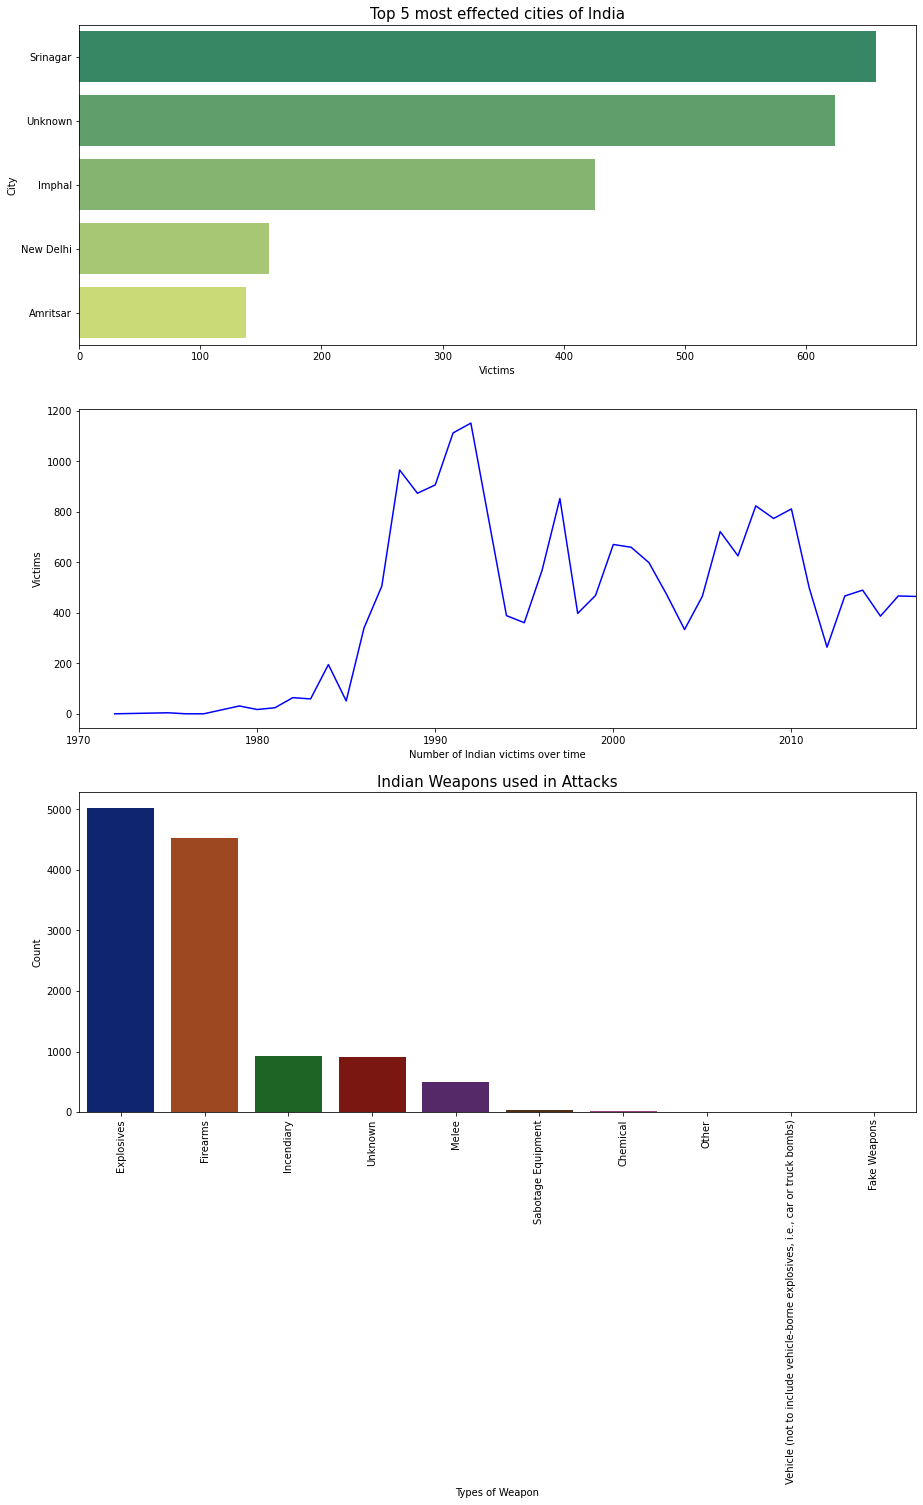

In [188]:
fig, axs=plt.subplots(nrows=3, ncols=1, figsize=(15,20))
sns.barplot(x='eventid', y='City',data=IndianCities, ci=None,ax=axs[0], palette='summer')
axs[0].set_title(f'Top 5 most effected cities of India',fontsize=15)
axs[0].set_xlabel('Victims', fontsize=10)
axs[0].set_ylabel('City', fontsize=10)

sns.lineplot(x='Year',y='Killed',data=India_year, ax=axs[1], color = 'blue')
axs[1].set_xlim([1970,2017])
axs[1].set_xlabel('Number of Indian victims over time',fontsize=10)
axs[1].set_ylabel('Victims', fontsize=10)

sns.barplot(x='WeaponType', y='eventid',data=India_weapon, ci=None,ax=axs[2], palette='dark')
axs[2].set_xticklabels(axs[2].get_xticklabels(),rotation=90)
axs[2].set_title(f'Indian Weapons used in Attacks',fontsize=15)
axs[2].set_xlabel('Types of Weapon', fontsize=10)
axs[2].set_ylabel('Count', fontsize=10)

## Conclusion

###  Total Death so far : 411868

### Year with most attack : 2014

###  Most effected region across the globe : Middle East & North Africa, South Asia

###  Most effected Country : Iraq

### Most effected city: Baghdad

### Most active terrorist group : Taliban

### Most used Attack Type : bombing / Explosive

### Most effected city in India : Srinagar

### Commonly used weapons by terrorist in India : Explosive & Firearms

# Thank You